# Image Filters Using CNN

- **Name : Asad Shaikh**
- **Rolll No: 13    SAP 40778230016**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

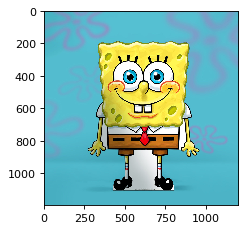

In [ ]:
#Reading Image
spong = imread('https://www.spongebobshop.com/cdn/shop/products/SB-Standees-Spong-3_1200x.jpg')
plt.figure(figsize=(6,3), dpi=80)
imshow(spong)

In [ ]:
#Filter MAtrices
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

blur = np.array([[0.11,0.11,0.11],
                    [0.11,0.11,0.11],
                    [0.11,0.11,0.11]])


vertical = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])


gaussian = (1/16.0) * np.array([[1,2,1],
                                [2,4,2],
                                [1,2,1]])

Text(0.5, 1.0, 'Vertical')

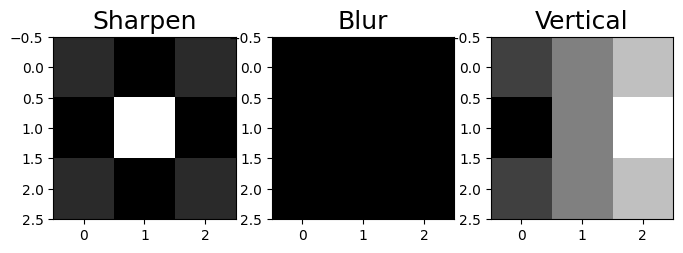

In [ ]:
#plotting the filters

fig,ax = plt.subplots(1,3, figsize = (8,6))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize=18)

ax[1].imshow(blur, cmap='gray')
ax[1].set_title(f'Blur', fontsize=18)

ax[2].imshow(vertical, cmap='gray')
ax[2].set_title(f'Vertical', fontsize=18)

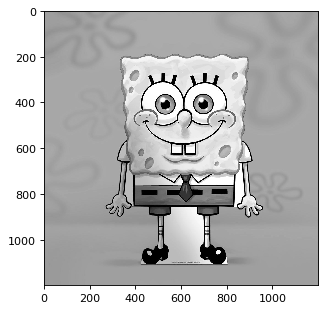

In [ ]:
#Grayscaling Image
spong_gray = rgb2gray(spong)
plt.figure(num=None, figsize=(6,4), dpi=80)
imshow(spong_gray)

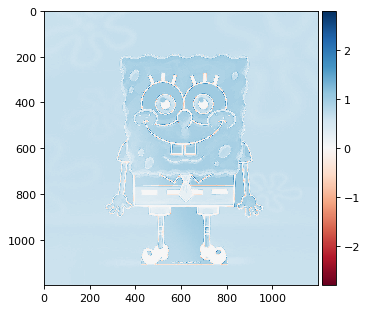

In [ ]:
#Function for applying filters
def multi_convolver(image, kernel, iterations):
  for i in range(iterations):
    image = convolve2d(image, kernel, 'same',
                       boundary = 'fill', fillvalue = 0)
  return image

convolved_image = multi_convolver(spong_gray, sharpen, 1)

plt.figure(num=None, figsize=(6,4), dpi=80)
imshow(convolved_image);

In [ ]:
#For colored Image
def convolver_rgb(image, kernel, iterations = 1):
  convolved_image_r = multi_convolver(image[:,:,0], kernel, iterations)
  convolved_image_g = multi_convolver(image[:,:,1], kernel, iterations)
  convolved_image_b = multi_convolver(image[:,:,2], kernel, iterations)

  reformed_image = np.dstack((np.rint(abs(convolved_image_r)),
                              np.rint(abs(convolved_image_g)),
                              np.rint(abs(convolved_image_b))))/255

  fig,ax = plt.subplots(1,3, figsize = (8,6))

  ax[0].imshow(abs(convolved_image_r), cmap='Reds')
  ax[0].set_title(f'Red', fontsize=15)

  ax[1].imshow(abs(convolved_image_g), cmap='Greens')
  ax[1].set_title(f'Green', fontsize=18)

  ax[2].imshow(abs(convolved_image_b), cmap='Blues')
  ax[2].set_title(f'Blue', fontsize=18)

  return np.array(reformed_image*255).astype(np.uint8)

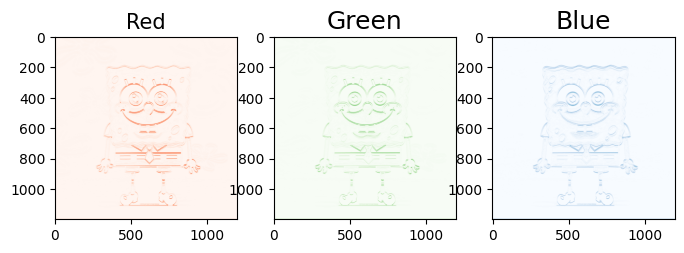

In [ ]:
#Can add different filters (defined above) here
convolved_rgb_gauss = convolver_rgb(spong, vertical.T ,1)

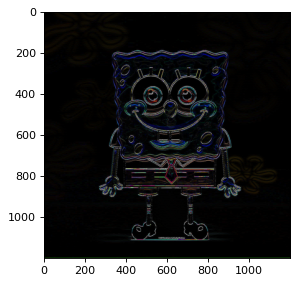

In [ ]:
plt.figure(num=None, figsize=(6,4), dpi=80)
plt.imshow(convolved_rgb_gauss,vmin=0,vmax=255);

# CNN_Parameter_Calculation

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 padding='same',
                 use_bias=False))
model.add(Conv2D(17, (3,3), padding='same', use_bias=False))
model.add(Conv2D(13, (3,3), padding='same', use_bias=False))
model.add(Conv2D(7, (3,3), padding='same', use_bias=False))
model.compile(loss = 'categorical_crossentropy', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 17)          │           4,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 13)          │           1,989 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 7)           │             819 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,104 (39.47 KB)

 Trainable params: 10,104 (39.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 padding='same',
                 use_bias=True))
model.add(Conv2D(17, (3,3), padding='same', use_bias=True))
model.add(Conv2D(13, (3,3), padding='same', use_bias=True))
model.add(Conv2D(7, (3,3), padding='same', use_bias=True))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 17)          │           4,913 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 13)          │           2,002 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 7)           │             826 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,173 (39.74 KB)

 Trainable params: 10,173 (39.74 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 use_bias=False))
model.add(Conv2D(17, (3,3), use_bias=False))
model.add(Conv2D(13, (3,3), use_bias=False))
model.add(Conv2D(7, (3,3), use_bias=False))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 32)          │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 22, 22, 17)          │           4,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 20, 20, 13)          │           1,989 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 18, 18, 7)           │             819 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,104 (39.47 KB)

 Trainable params: 10,104 (39.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 padding='valid',
                 use_bias=False))
model.add(Conv2D(17, (3,3), padding='valid', use_bias=False))
model.add(Conv2D(13, (3,3), padding='valid', use_bias=False))
model.add(Conv2D(7, (3,3), padding='valid', use_bias=False))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 32)          │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 22, 22, 17)          │           4,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 20, 20, 13)          │           1,989 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 18, 18, 7)           │             819 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,104 (39.47 KB)

 Trainable params: 10,104 (39.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(10, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 strides = (1,1),
                 padding='valid',
                 use_bias=False))
model.add(Conv2D(20, (5,5), (2,2), padding='valid', use_bias=False))
model.add(Conv2D(40, (5,5), (2,2), padding='valid', use_bias=False))


model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 24, 24, 10)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 10, 10, 20)          │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 3, 3, 40)            │          20,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,750 (100.59 KB)

 Trainable params: 25,750 (100.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(10, input_shape=(39,39,3),
                 kernel_size = (3,3),
                 padding='valid',))
model.add(Conv2D(20, (5,5), (2,2), padding='valid' ))
model.add(Conv2D(40, (5,5), (2,2),padding='valid'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 37, 37, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 17, 17, 20)          │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 40)            │          20,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,340 (98.98 KB)

 Trainable params: 25,340 (98.98 KB)

 Non-trainable params: 0 (0.00 B)

# Checking the effects of MaxPooling on model parameters

In [ ]:
import tensorflow as tf
x = tf.constant([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                           strides=(1, 1), padding='valid')
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[5],
         [6]],

        [[8],
         [9]]]], dtype=int32)>

In [ ]:
x = tf.constant([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(2, 2), padding='valid')
max_pool_2d(x)

<tf.Tensor: shape=(1, 1, 2, 1), dtype=int32, numpy=
array([[[[6],
         [8]]]], dtype=int32)>

In [ ]:
x = tf.constant([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(2, 2), padding='same')
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[ 6],
         [ 8]],

        [[10],
         [12]]]], dtype=int32)>

In [ ]:
x = tf.constant([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(1, 1), padding='same')
max_pool_2d(x)

<tf.Tensor: shape=(1, 3, 4, 1), dtype=int32, numpy=
array([[[[ 6],
         [ 7],
         [ 8],
         [ 8]],

        [[10],
         [11],
         [12],
         [12]],

        [[10],
         [11],
         [12],
         [12]]]], dtype=int32)>